# CardioGood-Fitness-Data-Analysis

## Context
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store at any time in the past three months. The data is stored in the CardioGoodFitness.csv file.

## Objective
Perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

## Data Dictionary
The team identified the following customer variables to study:

column | description
-------|-----------
Product|Product purchased - TM195, TM498, or TM798
Gender|Male or Female
Age|Age of the customer in years
Education|Education of the customer in years
MaritalStatus|Single or partnered
Income|Annual household income
Usage|The average number of times the customer plans to use the treadmill each week;
Miles|The average number of miles the customer expects to walk/run each week;
Fitness|Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.

## Questions to explore
1. What are the different types of variables in the data?
2. What is the distribution of different variables in the data?
3. Which product is more popular among males or females?
4. Is the product purchase affected by the marital status of the customer?
5. Is there a significant correlation among some of the variables?
6. What is the distribution of the average number of miles for each product?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./CardioGoodFitness.csv')

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


## 1. What are the different types of variables in the data?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


In [9]:
num_cols = list(df.describe().columns)
obj_cols = list(df.describe(include='object').columns)

In [11]:
print(f'There are {len(num_cols)} numeric columns which are {num_cols}.')

There are 6 numeric columns which are ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'].


In [12]:
print(f'There are {len(obj_cols)} categorical columns which are {obj_cols}.')

There are 3 categorical columns which are ['Product', 'Gender', 'MaritalStatus'].


# 2. What is the distribution of different variables in the data?

In [13]:
num_cols

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Count'>

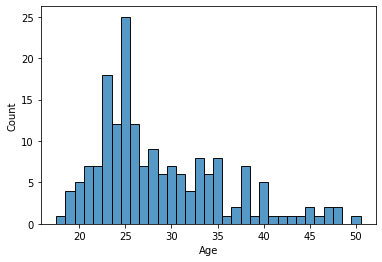

In [23]:
sns.histplot(data=df, x=num_cols[0], discrete=True)

<AxesSubplot:xlabel='Education', ylabel='Count'>

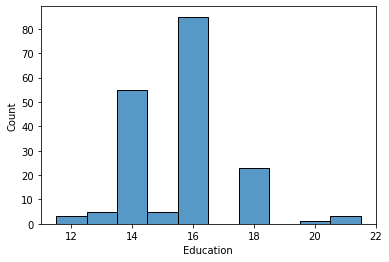

In [24]:
sns.histplot(data=df, x=num_cols[1], discrete=True)

<AxesSubplot:xlabel='Usage', ylabel='Count'>

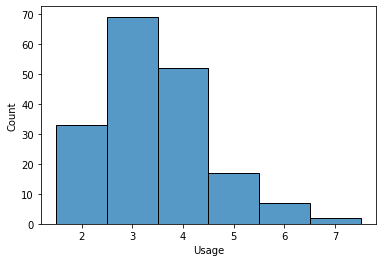

In [22]:
sns.histplot(data=df, x=num_cols[2], discrete=True)

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

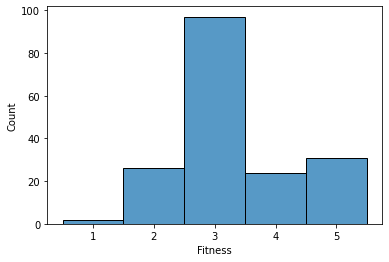

In [21]:
sns.histplot(data=df, x=num_cols[3], discrete=True )

<AxesSubplot:xlabel='Income', ylabel='Count'>

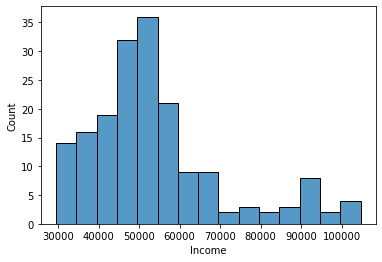

In [26]:
sns.histplot(data=df, x=num_cols[4])

<AxesSubplot:xlabel='Miles', ylabel='Count'>

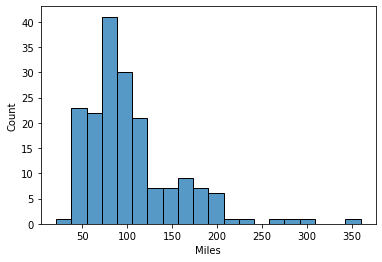

In [27]:
sns.histplot(data=df, x=num_cols[5])

In [28]:
obj_cols

['Product', 'Gender', 'MaritalStatus']

<AxesSubplot:xlabel='Product', ylabel='count'>

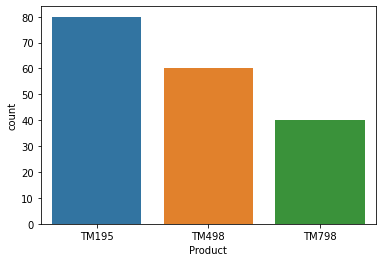

In [29]:
sns.countplot(data=df, x=obj_cols[0])

<AxesSubplot:xlabel='Gender', ylabel='count'>

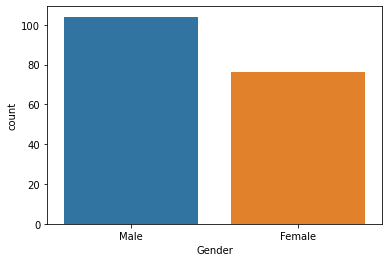

In [30]:
sns.countplot(data=df, x=obj_cols[1])

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

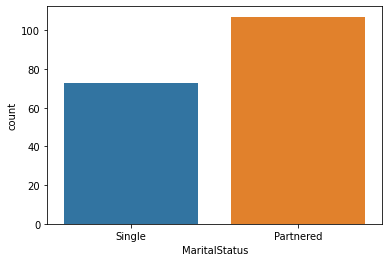

In [31]:
sns.countplot(data=df, x=obj_cols[2])

# 3. Which product is more popular among males or females?

<AxesSubplot:xlabel='Product', ylabel='count'>

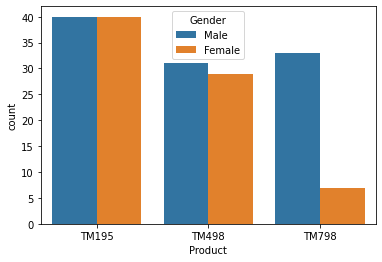

In [32]:
sns.countplot(data=df, x='Product', hue='Gender')

Product TM798 is way more popular among men.

# 4. Is the product purchase affected by the marital status of the customer?

<AxesSubplot:xlabel='Product', ylabel='count'>

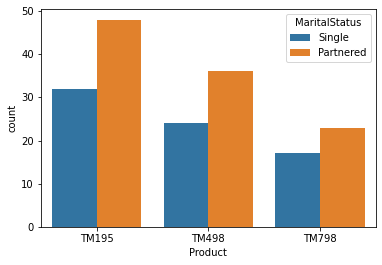

In [33]:
sns.countplot(data=df, x='Product', hue='MaritalStatus')

Customers definetly tend to be partnered.

# 5. Is there a significant correlation among some of the variables?

In [34]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

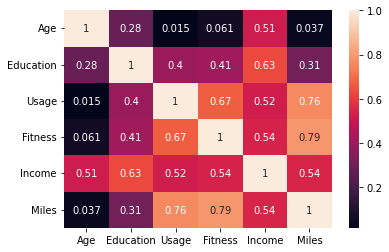

In [35]:
sns.heatmap(data=df.corr(), annot=True)

Top 3 correlations (all high are):
1. 'Fitness - Miles' (0.79 Pearson's coefficient).
2. 'Usage - Miles' (0.76 Pearson's coefficient).
3. 'Fitness - Usage' (0.67 Pearson's coefficient).

Ultimately, these three variables (Fitness, Usage, and Miles) compound the 'overall fitness' of the customer.

Interestlingly, this data also confirms the well-known 'Education-Income' strong relationship (0.63). 'Income' is stronger related to 'overall fitness' than 'Education', though.

# 6. What is the distribution of the average number of miles for each product?

<AxesSubplot:xlabel='Miles', ylabel='Count'>

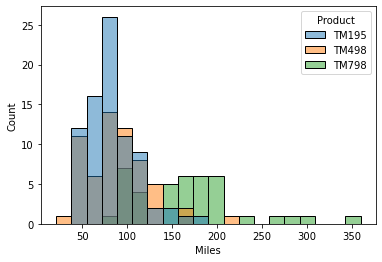

In [36]:
sns.histplot(data=df, x='Miles', hue='Product')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

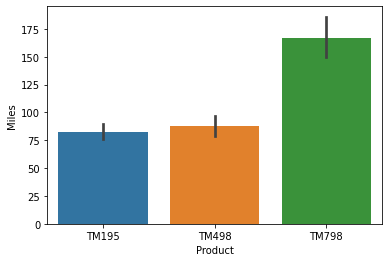

In [37]:
sns.barplot(data=df, x='Product', y='Miles')

TM798 by far allows more miles than the other two products.